server/server_networkSim4_server_bikel1_benchmark.csv
server/server_networkSim4_server_bikel5_benchmark.csv
server/server_networkSim4_server_kyber768_benchmark.csv
server/server_networkSim4_server_hqc256_benchmark.csv
server/server_networkSim4_server_kyber512_benchmark.csv
server/server_networkSim4_server_hqc192_benchmark.csv
server/server_networkSim4_server_kyber1024_benchmark.csv
server/server_networkSim4_server_hqc128_benchmark.csv
server/server_networkSim4_server_bikel3_benchmark.csv


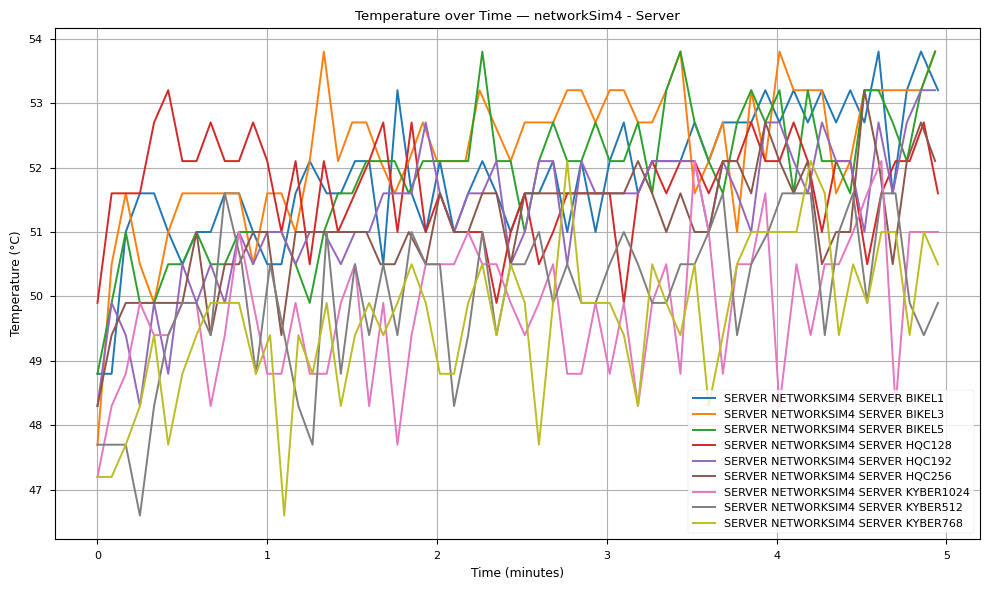

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import glob
import os

afile = "networkSim4"
type = "Server"
csv_files = glob.glob(f"server/*{afile}*.csv")
for files in csv_files:
    print(files)

def extract_label(filename):
    base = os.path.basename(filename)
    label = base.replace("_benchmark.csv", "").replace("client_", "").replace("networkSim1_", "")
    return label.replace("_", " ").upper()

combined_df = pd.DataFrame()

for file in csv_files:
    label = extract_label(file)
    df = pd.read_csv(file)

    df["timestamp"] = pd.to_datetime(df["timestamp"], format="%H:%M:%S")
    start_time = df["timestamp"].iloc[0]
    df["elapsed_seconds"] = (df["timestamp"] - start_time).dt.total_seconds()
    df["elapsed_minutes"] = df["elapsed_seconds"] / 60

    df["algorithm"] = label
    combined_df = pd.concat([combined_df, df], ignore_index=True)

# Plotting temperature over time
plt.figure(figsize=(10, 6))

for label, group in combined_df.groupby("algorithm"):
    plt.plot(group["elapsed_minutes"], group["temp_c"], label=label)

plt.xlabel("Time (minutes)")
plt.ylabel("Temperature (°C)")
plt.title(f"Temperature over Time — {afile} - {type}")
plt.legend()
plt.grid(True)
plt.tight_layout()
# plt.style.use('Solarize_Lightr2')
plt.style.use('seaborn-v0_8-paper')

plt.savefig(f"graphs/memory_usage_overtime_{afile}_{type}.png", dpi=300)
plt.show()


In [17]:
import pandas as pd
import os
import glob


def calculate_memory_stats(atype,afile):
    csv_files = glob.glob(f"{atype}/*{afile}*.csv")
    results = []

    for file in csv_files:
        df = pd.read_csv(file)
        algo_name = os.path.splitext(os.path.basename(file))[0]
        df['temp_c'] = pd.to_numeric(df['temp_c'], errors='coerce')

        mean = df['temp_c'].mean()
        std = df['temp_c'].std()

        results.append({
            'Algorithm': algo_name,
            'Mean ± Std Dev (C)': f"{mean:.2f} ± {std:.2f}"
        })

    results_df = pd.DataFrame(results)
    results_df.sort_values('Algorithm', inplace=True)
    print(results_df.to_string(index=False))


In [18]:
calculate_memory_stats("client","networkSim1")


                                    Algorithm Mean ± Std Dev (C)
   client_networkSim1_client_bikel1_benchmark       48.88 ± 0.59
   client_networkSim1_client_bikel3_benchmark       52.69 ± 0.36
   client_networkSim1_client_bikel5_benchmark       53.41 ± 0.47
   client_networkSim1_client_hqc128_benchmark       53.29 ± 0.40
   client_networkSim1_client_hqc192_benchmark       53.86 ± 0.46
   client_networkSim1_client_hqc256_benchmark       53.90 ± 0.48
client_networkSim1_client_kyber1024_benchmark       52.21 ± 0.46
 client_networkSim1_client_kyber512_benchmark       52.15 ± 0.44
 client_networkSim1_client_kyber768_benchmark       52.09 ± 0.47


In [20]:
calculate_memory_stats("client","networkSim2")


                                    Algorithm Mean ± Std Dev (C)
   client_networkSim2_client_bikel1_benchmark       49.77 ± 0.42
   client_networkSim2_client_bikel3_benchmark       52.60 ± 0.48
   client_networkSim2_client_bikel5_benchmark       53.40 ± 0.49
   client_networkSim2_client_hqc128_benchmark       53.09 ± 0.55
   client_networkSim2_client_hqc192_benchmark       54.20 ± 0.52
   client_networkSim2_client_hqc256_benchmark       52.21 ± 0.64
client_networkSim2_client_kyber1024_benchmark       52.24 ± 0.40
 client_networkSim2_client_kyber512_benchmark       52.15 ± 0.53
 client_networkSim2_client_kyber768_benchmark       52.14 ± 0.54


In [21]:
calculate_memory_stats("client","networkSim3")


                                    Algorithm Mean ± Std Dev (C)
   client_networkSim3_client_bikel1_benchmark       50.45 ± 0.42
   client_networkSim3_client_bikel3_benchmark       52.39 ± 0.46
   client_networkSim3_client_bikel5_benchmark       53.38 ± 0.51
   client_networkSim3_client_hqc128_benchmark       53.48 ± 0.49
   client_networkSim3_client_hqc192_benchmark       53.92 ± 0.48
   client_networkSim3_client_hqc256_benchmark       52.41 ± 0.60
client_networkSim3_client_kyber1024_benchmark       51.95 ± 0.47
 client_networkSim3_client_kyber512_benchmark       51.98 ± 0.48
 client_networkSim3_client_kyber768_benchmark       52.20 ± 0.48


In [22]:
calculate_memory_stats("client","networkSim4")


                                    Algorithm Mean ± Std Dev (C)
   client_networkSim4_client_bikel1_benchmark       52.64 ± 0.48
   client_networkSim4_client_bikel3_benchmark       52.26 ± 0.42
   client_networkSim4_client_bikel5_benchmark       53.51 ± 0.38
   client_networkSim4_client_hqc128_benchmark       53.66 ± 0.42
   client_networkSim4_client_hqc192_benchmark       54.08 ± 0.45
   client_networkSim4_client_hqc256_benchmark       52.44 ± 0.46
client_networkSim4_client_kyber1024_benchmark       52.06 ± 0.48
 client_networkSim4_client_kyber512_benchmark       52.35 ± 0.49
 client_networkSim4_client_kyber768_benchmark       51.97 ± 0.46


In [25]:
print("NETWORK SIM 1")
calculate_memory_stats("server","networkSim1")
print("NETWORK SIM 2")
calculate_memory_stats("server","networkSim2")



NETWORK SIM 1
                                    Algorithm Mean ± Std Dev (C)
   server_networkSim1_server_bikel1_benchmark       48.37 ± 0.88
   server_networkSim1_server_bikel3_benchmark       51.04 ± 1.32
   server_networkSim1_server_bikel5_benchmark       51.53 ± 1.29
   server_networkSim1_server_hqc128_benchmark       48.23 ± 0.88
   server_networkSim1_server_hqc192_benchmark       48.43 ± 0.95
   server_networkSim1_server_hqc256_benchmark       50.22 ± 0.85
server_networkSim1_server_kyber1024_benchmark       47.85 ± 1.06
 server_networkSim1_server_kyber512_benchmark       47.96 ± 0.87
 server_networkSim1_server_kyber768_benchmark       47.27 ± 0.70
NETWORK SIM 2
                                    Algorithm Mean ± Std Dev (C)
   server_networkSim2_server_bikel1_benchmark       50.55 ± 0.95
   server_networkSim2_server_bikel3_benchmark       51.33 ± 1.09
   server_networkSim2_server_bikel5_benchmark       51.75 ± 1.30
   server_networkSim2_server_hqc128_benchmark       49.16 ± 1.

In [29]:
print("NETWORK SIM 3")
calculate_memory_stats("server","networkSim3")


NETWORK SIM 3
                                    Algorithm Mean ± Std Dev (C)
   server_networkSim3_server_bikel1_benchmark       50.83 ± 0.93
   server_networkSim3_server_bikel3_benchmark       51.11 ± 1.27
   server_networkSim3_server_bikel5_benchmark       52.04 ± 1.26
   server_networkSim3_server_hqc128_benchmark       49.49 ± 0.90
   server_networkSim3_server_hqc192_benchmark       50.81 ± 1.21
   server_networkSim3_server_hqc256_benchmark       50.53 ± 1.08
server_networkSim3_server_kyber1024_benchmark       49.27 ± 1.07
 server_networkSim3_server_kyber512_benchmark       49.03 ± 1.20
 server_networkSim3_server_kyber768_benchmark       48.92 ± 1.06


In [30]:
print('------------------------------------------------')
print("NETWORK SIM 4")
calculate_memory_stats("server","networkSim4")

------------------------------------------------
NETWORK SIM 4
                                    Algorithm Mean ± Std Dev (C)
   server_networkSim4_server_bikel1_benchmark       51.86 ± 1.02
   server_networkSim4_server_bikel3_benchmark       52.26 ± 1.09
   server_networkSim4_server_bikel5_benchmark       51.84 ± 1.09
   server_networkSim4_server_hqc128_benchmark       51.70 ± 0.74
   server_networkSim4_server_hqc192_benchmark       51.31 ± 1.08
   server_networkSim4_server_hqc256_benchmark       51.11 ± 0.90
server_networkSim4_server_kyber1024_benchmark       49.81 ± 1.08
 server_networkSim4_server_kyber512_benchmark       50.01 ± 1.16
 server_networkSim4_server_kyber768_benchmark       49.66 ± 1.16
